In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
census = pd.read_csv('/content/drive/MyDrive/Databases/Week 18 - USL/acs2015_county_data.csv')

In [ ]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [ ]:
cols = [c for c in census.columns.values if c not in ['CensusID','State','County']]

In [ ]:
cols

['CensusId',
 'TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'Citizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [ ]:
census.isnull().sum(axis=0)

In [ ]:
census = census.dropna()

#KMEans
K-Mean es una de las técnicas de agrupación en clústeres de aprendizaje automático no supervisado más utilizadas. 

Es una técnica de agrupación basada en centroides que necesita que usted decida el número de agrupaciones (centroides) y coloque aleatoriamente los centroides de agrupación para comenzar el proceso de agrupación. 

El objetivo es dividir N observaciones en K grupos repetidamente hasta que no se puedan formar más grupos


Ventajas
1.   Facil de Implementar
2.   Bueno para trabajar con Datasets grandes

Desventajas

1.   No funciona bien con Outliers, tienden a jalar el centro
2.   Leno entre más dimensiones existan





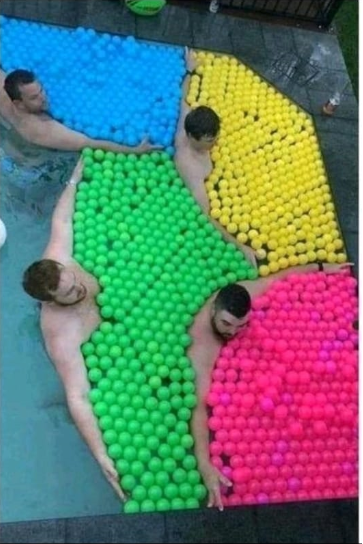

1. Decide el número de agrupaciones. Este número se llama K y el número de conglomerados es igual al número de centroides. Basado en el valor de K, genere las coordenadas para K centroides aleatorios.
2. Para cada punto, calcule la distancia euclidiana entre el punto y cada uno de los centroides.
3. Asigne el punto a su centroide más cercano. Los puntos asignados al mismo centroide forman un grupo.
4. Una vez que se forman los conglomerados, calcule el nuevo centroide para cada conglomerado tomando la media del conglomerado. La media del conglomerado es la media de las coordenadas xey de todos los puntos que pertenecen al conglomerado.
5. Repita los pasos 2, 3 y 4 hasta que los centroides no puedan moverse más. En otras palabras, repita estos pasos hasta la convergencia.

Ejemplos
* Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
* Categorización de Inventario: agrupar productos por actividad en sus ventas
* Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

In [ ]:
from sklearn.cluster import KMeans

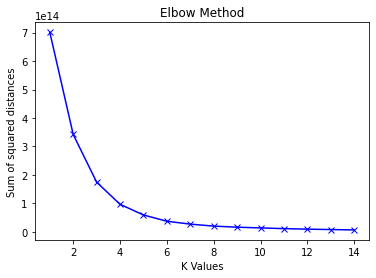

In [ ]:
#Elbow Method/ Método de codo nos funciona apra identificar número adecuado de posibles clúster
K = range(1,15)
sum_of_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(census[cols])
  sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method")
plt.show()



In [ ]:
kmeans = KMeans(n_clusters=4,random_state=111)
census_clusters = kmeans.fit(census[cols])

In [ ]:
len(census_clusters.cluster_centers_)

4

In [ ]:
preds = census_clusters.fit_predict(census[cols])


In [ ]:
census['cluster_kmeans_1'] = preds
census.cluster_kmeans_1.unique()

array([0, 3, 1, 2], dtype=int32)

In [ ]:
census[census.cluster_kmeans_1 == 0]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster_kmeans_1
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,0.0,0.0,43656,16948.0,1234.0,9102,538,48.5,56.1,30.1,21.6,24.7,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2,0
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,0.0,0.0,7085,18104.0,3771.0,8821,939,39.1,58.1,18.4,38.2,18.5,15.7,9.1,69.1,17.8,1.0,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2,0
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,0.0,0.0,18458,17818.0,1255.0,8420,486,54.0,68.3,23.6,21.0,21.8,13.9,19.7,82.0,11.4,0.1,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9,0
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,0.1,0.0,27924,15627.0,1836.0,7960,512,52.3,62.1,25.9,25.9,20.7,12.8,14.7,86.0,7.9,0.0,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3,0


In [ ]:
census.cluster_kmeans_1.value_counts()

0    3045
3     153
1      19
2       1
Name: cluster_kmeans_1, dtype: int64

In [ ]:
census.groupby(['cluster_kmeans_1']).Income.mean()

cluster_kmeans_1
0    45264.092282
1    58589.894737
2    56196.000000
3    61615.901961
Name: Income, dtype: float64

In [ ]:
census.groupby(['cluster_kmeans_1']).ChildPoverty.mean()

cluster_kmeans_1
0    24.418030
1    23.584211
2    25.800000
3    19.681046
Name: ChildPoverty, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


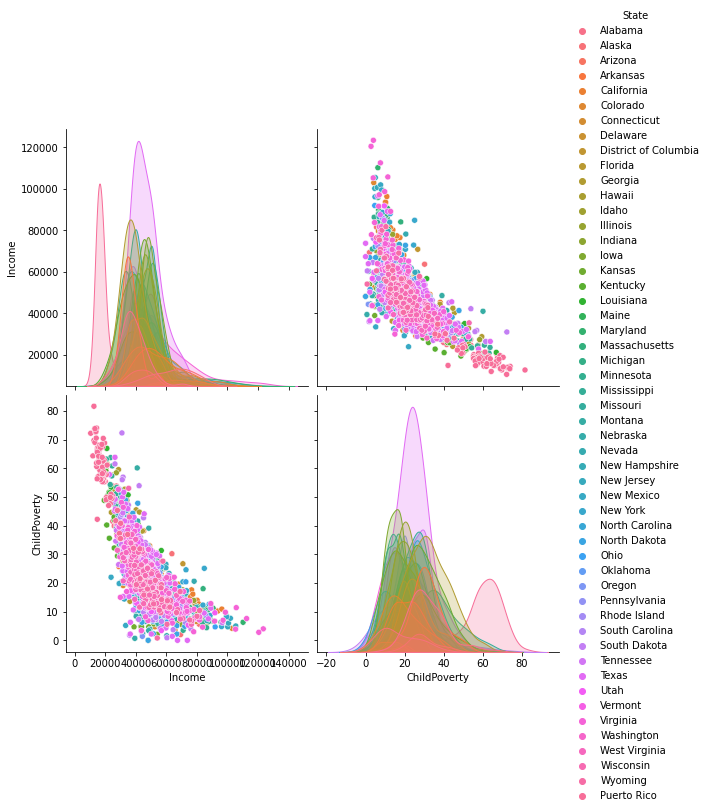

In [ ]:
sns.pairplot(census, hue='State', size=4, vars=['Income','ChildPoverty'],kind= 'scatter')

In [ ]:
print(census.groupby('State').size().nlargest(4))

State
Texas       253
Georgia     159
Virginia    133
Kentucky    120
dtype: int64


In [ ]:
new_states=['Texas','Georgia','Virginia','Kentucky']
census_new = census[census.State.isin(new_states)]
len(census_new)

665

In [ ]:
len(census)

3218

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
census_new['IncomeSS']= scale.fit_transform(census_new.Income.values.reshape(-1,1))
census_new['ChildPovertySS']= scale.fit_transform(census_new.ChildPoverty.values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


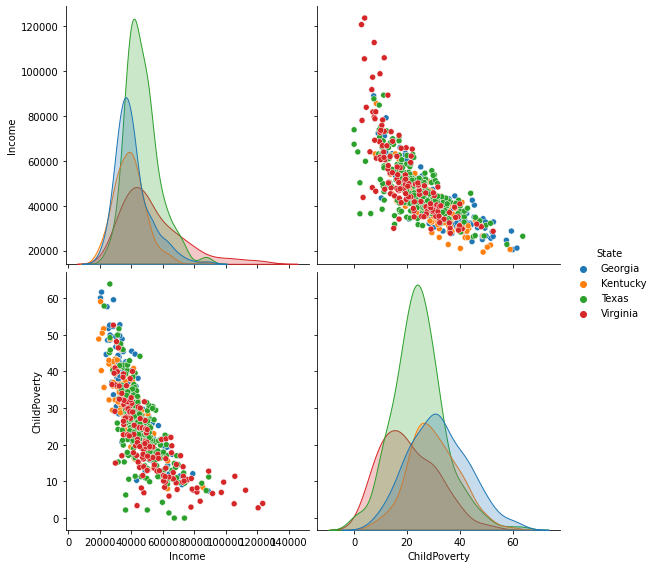

In [ ]:
sns.pairplot(census_new, hue='State', size=4, vars=['Income','ChildPoverty'],kind= 'scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


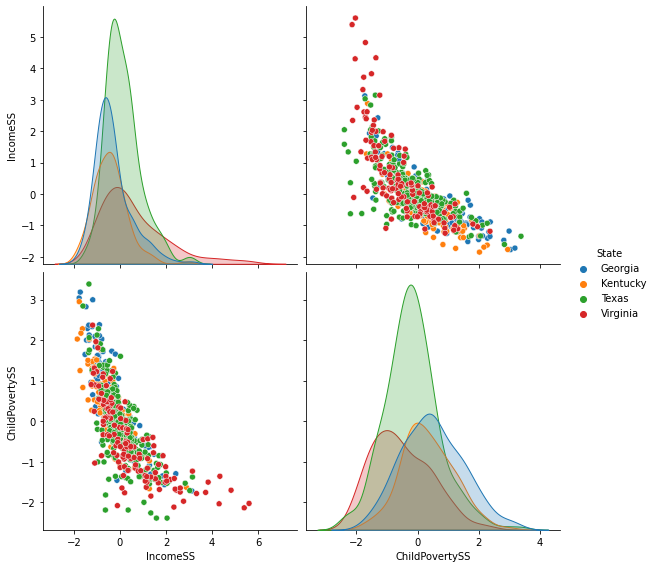

In [ ]:
sns.pairplot(census_new, hue='State', size=4, vars=['IncomeSS','ChildPovertySS'],kind= 'scatter')

In [ ]:
new_df = census_new[['County','IncomeSS','ChildPovertySS']]

In [ ]:
cols_2 = ['IncomeSS','ChildPovertySS']

In [ ]:
kmeans_2 = kmeans.fit(new_df[cols_2])


In [ ]:
kmeans_2.cluster_centers_

array([[ 0.53680706, -0.79023765],
       [-0.96986149,  1.47947807],
       [-0.35102379,  0.12521348],
       [ 2.41687297, -1.52866131]])

In [ ]:
preds_kmeans_2 = kmeans_2.predict(new_df[cols_2])

In [ ]:
new_df['cluster'] = preds_kmeans_2
new_df.cluster.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2, 1, 0, 3], dtype=int32)

In [ ]:
new_df.head()

,County,IncomeSS,ChildPovertySS,cluster
387,Appling,-0.577306,-0.111667,2
388,Atkinson,-1.021473,1.074658,1
389,Bacon,-0.575372,-0.383344,2
390,Baker,-0.064387,1.056546,2
391,Baldwin,-0.912114,1.445950,1


<function matplotlib.pyplot.show>

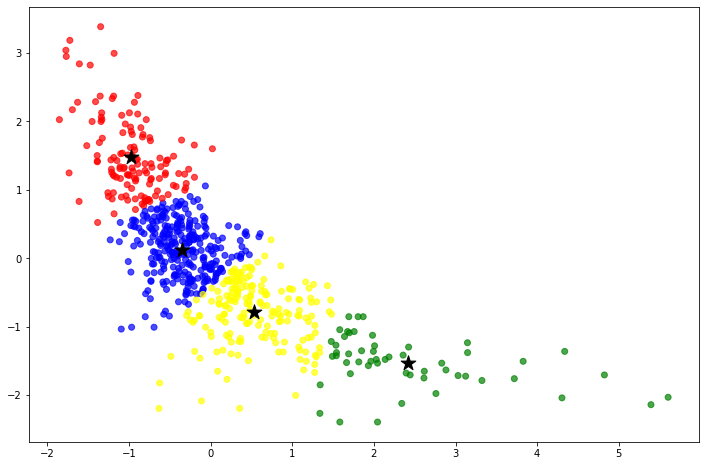

In [ ]:
X = new_df[cols_2].to_numpy()
labels = kmeans_2.predict(X)
center = kmeans_2.cluster_centers_
colors = ["yellow","red","blue","green"]
asignar=[]
for row in labels:
  asignar.append(colors[row])

plt.figure(figsize=(12,8))
feature_1 = X[:,0]
feature_2 = X[:,1]
plt.scatter(feature_1, feature_2, c=asignar, alpha=.7)
plt.scatter(center[:,0], center[:,1],marker = "*",c='black',s=240)
plt.show

#DBSCAN


DBSCAN hace esto midiendo la distancia entre cada punto y, si hay suficientes puntos lo suficientemente cerca, DBSCAN lo clasificará como un nuevo grupo.

Otros algoritmos de agrupación en clústeres como KMeans requieren que el usuario sepa cuántos clústeres existen en los datos.
En lugar de requerir cuántos clústeres se deben encontrar, DBSCAN requiere que el usuario ingrese la distancia máxima entre cada punto de datos que se puede considerar parte de un clúster y cuántos puntos de datos se necesitan para formar un clúster.



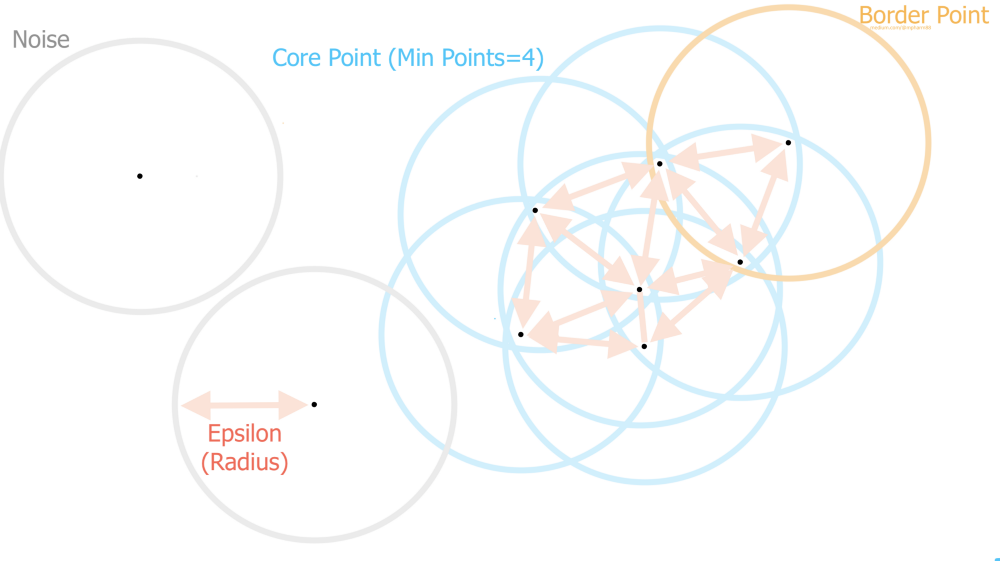

* Ruido (Noise): este es un punto que no tiene suficientes vecinos dentro de épsilon para ser parte de un clúster (incluido él mismo).
* Puntos de frontera (Border Points): este es un punto que tiene vecinos dentro de épsilon pero no suficientes vecinos para ser un punto central. Estos puntos forman el borde del grupo.
* Punto central (Core Points): puntos que tienen los puntos mínimos requeridos dentro de epsilon (incluido él mismo). Estos puntos junto con los puntos fronterizos formarán un grupo.

Ejemplos
DBSCAN se utiliza principalmente para agrupar en espacios planos.
* Se pueden lograr buenos resultados si se usa para mapear el efecto de desastres naturales o trazar la ubicación de estaciones meteorológicas en una ciudad.
* Esto también se puede utilizar cuando los datos se componen de puntos no discretos y es bueno para manejar valores atípicos.
* Los sistemas de recomendación utilizan DBSCAN para recomendar productos / programas a sus clientes.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

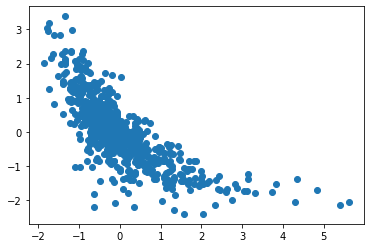

In [ ]:
plt.scatter(X[:,0],X[:,1])

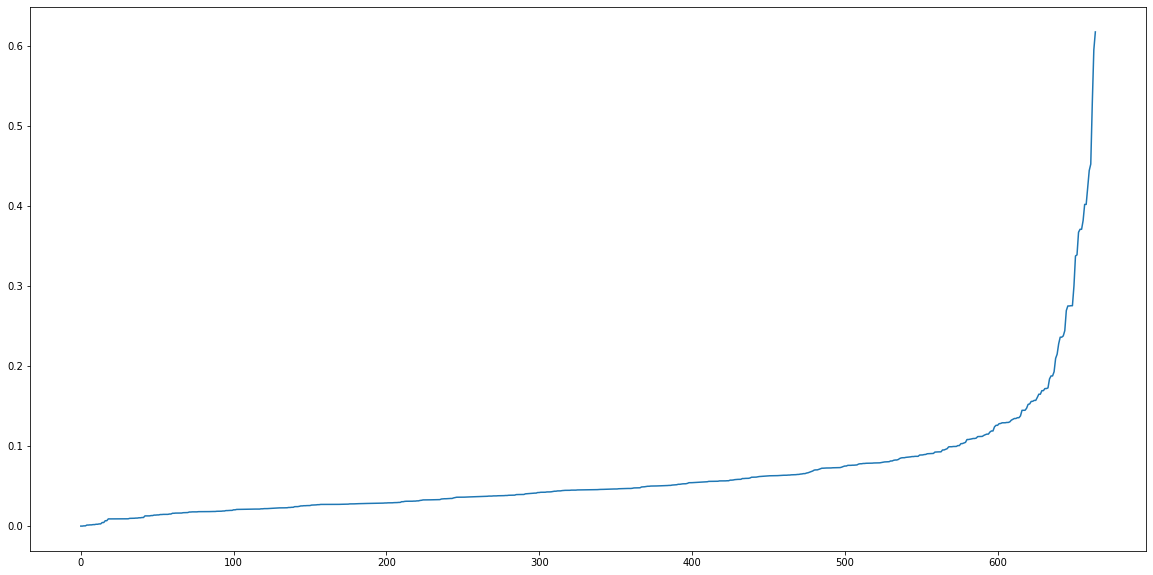

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors = 5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances= np.sort(distances, axis=0)[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.show()

In [ ]:
# Min_samples = si tenemos más de 2 minesiones, min samples = 2*dim , en este caso sería de 4
dbscan_1 = DBSCAN(eps=.20, min_samples = 4)
dbscan_1.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [ ]:
labels= dbscan_1.labels_
labels

In [ ]:
new_df['cluster_hdbscan'] = labels
new_df.cluster_hdbscan.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 0,  1, -1,  2,  3])

In [ ]:
new_df.head()

,County,IncomeSS,ChildPovertySS,cluster,cluster_hdbscan
387,Appling,-0.577306,-0.111667,2,0
388,Atkinson,-1.021473,1.074658,1,0
389,Bacon,-0.575372,-0.383344,2,0
390,Baker,-0.064387,1.056546,2,0
391,Baldwin,-0.912114,1.445950,1,0


In [ ]:
labels_mask_general = np.zeros_like(labels,dtype=bool)

In [ ]:
labels_mask_general[dbscan_1.core_sample_indices_]= True

In [ ]:
labels_mask_general

In [ ]:
n_clusters_ = len (set(labels))- (1 if -1 in labels else 0 )
n_clusters_

4

In [ ]:
n_noise_ = list(labels).count(-1)
n_noise_

60

In [ ]:
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0,1,len(unique_labels)))

In [ ]:
# colors
unique_labels

{-1, 0, 1, 2, 3}

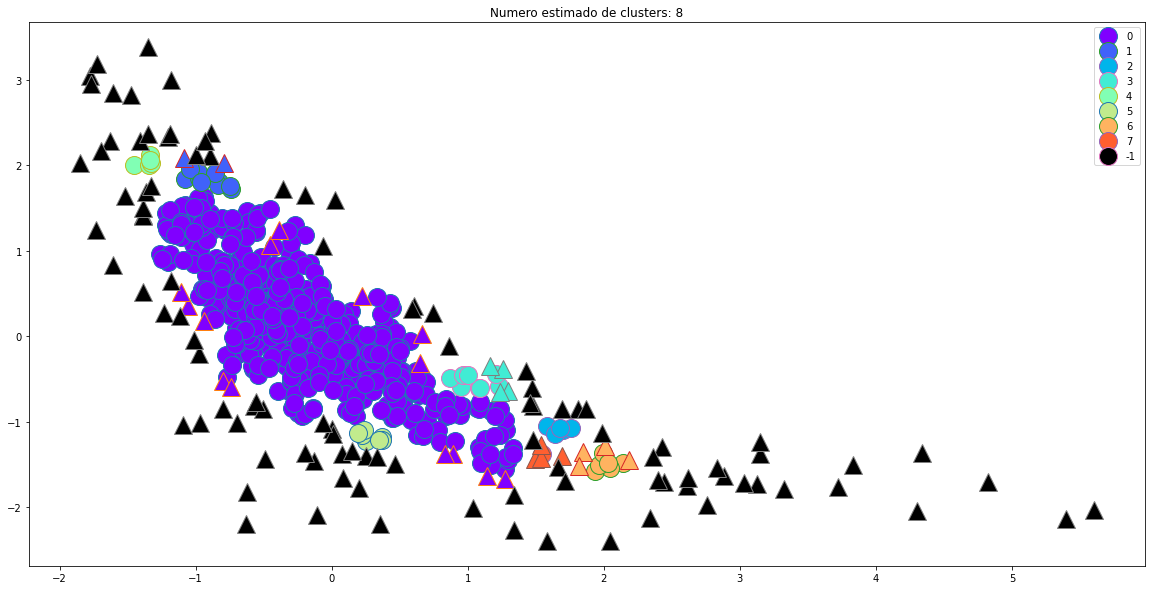

In [ ]:
# Visualizacion distancia .15
plt.figure(figsize=(20,10))
for k, col in zip(unique_labels, colors):
  if k==-1:
    col = "k"

  clase = (labels ==k)  
  # Es para lo que NO es ruido
  xy = X[clase & labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"o", markerfacecolor=col, markersize = 18, label=k, alpha =1)
    # Es para lo que SI es ruido
  xy = X[clase & ~labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"^", markerfacecolor=col, markersize = 18, alpha =1)

plt.title("Numero estimado de clusters: %d" %n_clusters_)
plt.legend()
plt.show()

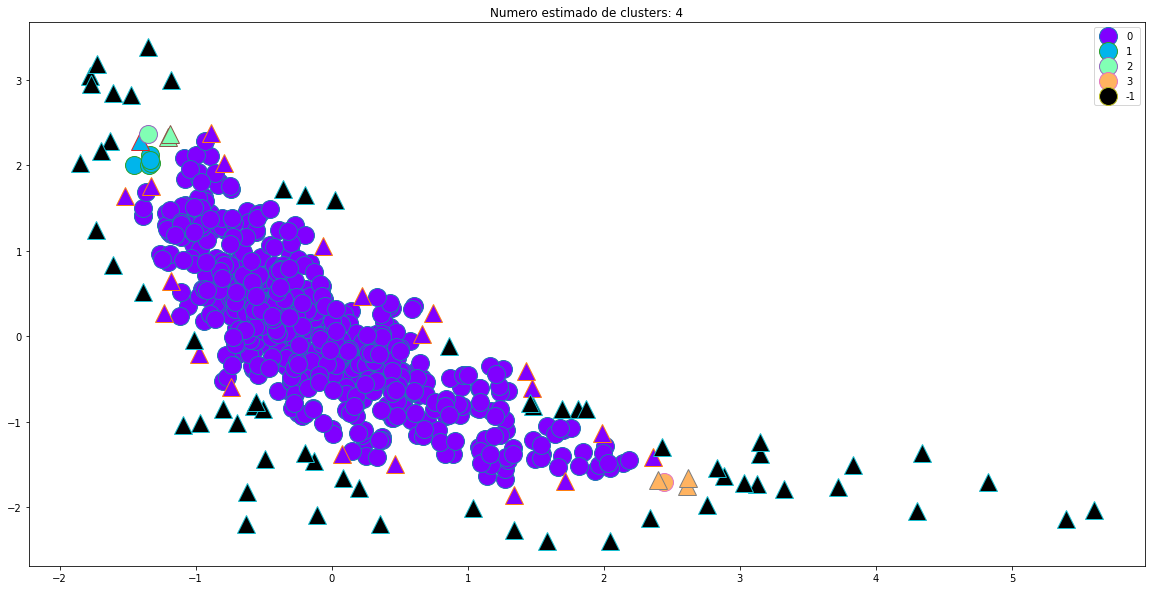

In [ ]:
# Visualizacion con distancia .20
plt.figure(figsize=(20,10))
for k, col in zip(unique_labels, colors):
  if k==-1:
    col = "k"

  clase = (labels ==k)  
  # Es para lo que NO es ruido
  xy = X[clase & labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"o", markerfacecolor=col, markersize = 18, label=k, alpha =1)
    # Es para lo que SI es ruido
  xy = X[clase & ~labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"^", markerfacecolor=col, markersize = 18, alpha =1)

plt.title("Numero estimado de clusters: %d" %n_clusters_)
plt.legend()
plt.show()

#Hierachical Clustering

## Agglomerative Clustering

En esta técnica, inicialmente cada punto de datos se considera un grupo individual. En cada iteración, los grupos similares se fusionan con otros grupos hasta que se forman uno o K grupos.
1. Cada uno se considera único. En el paso inicial, calculamos la proximidad de puntos individuales y consideramos los seis puntos de datos como grupos individuales como se muestra en la imagen a continuación.
2. En el paso dos, los grupos similares se fusionan y se forman como un solo grupo. Consideremos que B, C y D, E son grupos similares que se fusionaron en el paso dos. Ahora, nos quedamos con cuatro grupos que son A, BC, DE, F.
En cada paso se calcula la proximidad y se llega al grupo final


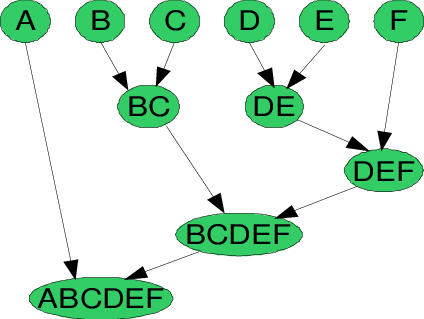

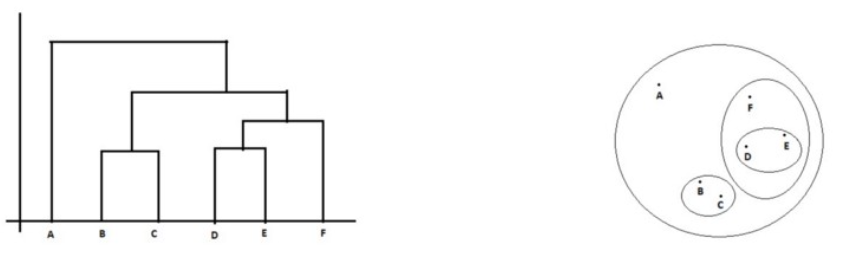

## Diviside Clustering
En palabras simples, podemos decir que el agrupamiento jerárquico divisivo es exactamente lo opuesto al agrupamiento jerárquico aglomerativo. En el agrupamiento jerárquico divisivo, consideramos todos los puntos de datos como un solo grupo y, en cada iteración, separamos los puntos de datos del grupo que no son similares. Cada punto de datos que se separa se considera un grupo individual. Al final, nos quedarán n grupos.

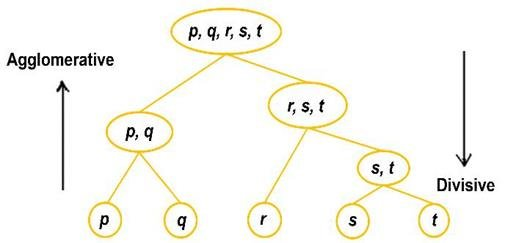

* por el tiempo de computo
* el divisivo va hacia abajo y eso te da 2 a la n -1 formas de ir partiendo tus subconjuntos y es muy caro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import pandas as pd
sns.set_context('poster')

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Databases/Week 19/customer_mall.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = data.iloc[:, [3,4]].values

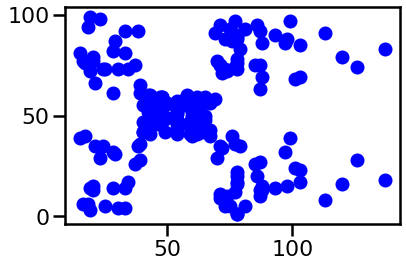

In [ ]:
plt.scatter(X.T[0], X.T[1], color='b')

# HDBSCAN

HDBSCAN utiliza un enfoque basado en la densidad que hace pocas suposiciones implícitas sobre los clústeres. 

Es un método no paramétrico que busca una jerarquía de conglomerados formada por los modos multivariados de la distribución subyacente. 

En lugar de buscar agrupaciones con una forma particular, busca regiones de los datos que sean más densas que el espacio circundante. 






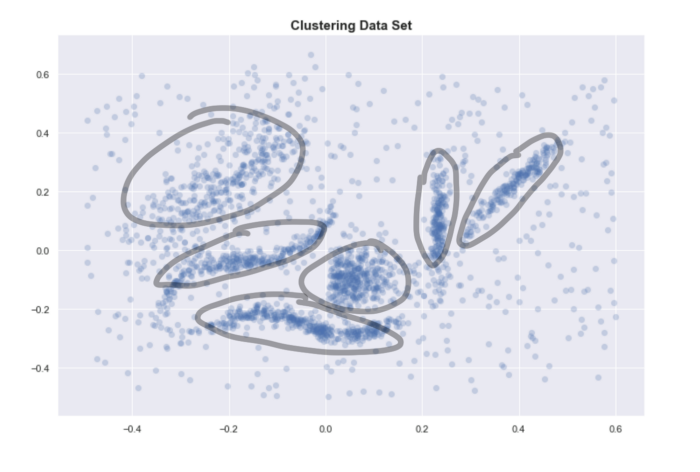

Las ventajas son:
* Fácil de implementar y no se requiere indicar el número de clusters
* El resultado es un Dendrograma que permite la visualización del resultado. \\
La desventajas son:
* Toma bastante tiempo
* No siempre es fácil identificar el número de clusters en el dendograma

## Dendogram

Este paso consiste en encontrar el número óptimo de clústers. VAmos a usar kis dendogramas


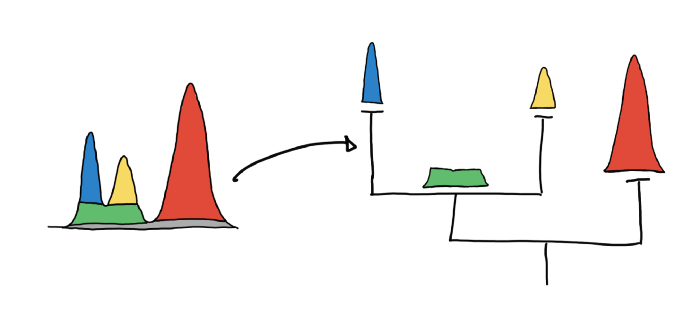

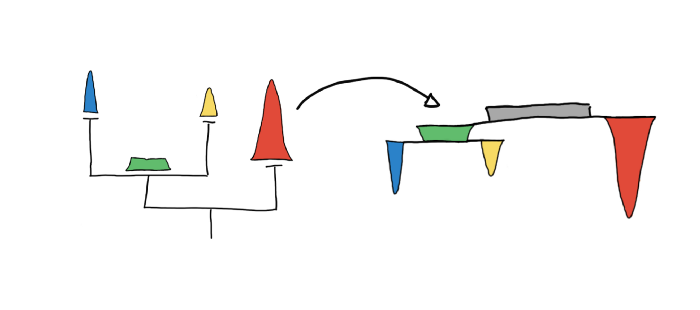

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 8.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311931 sha256=484cd1ac2386b28c5693040c50b5d7ae309d301ebdc49d4836e1e255e5b1a44c
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
import hdbscan
import scipy.cluster.hierarchy as sch

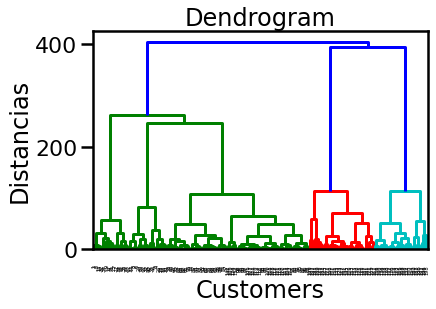

In [ ]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distancias')
plt.show()


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

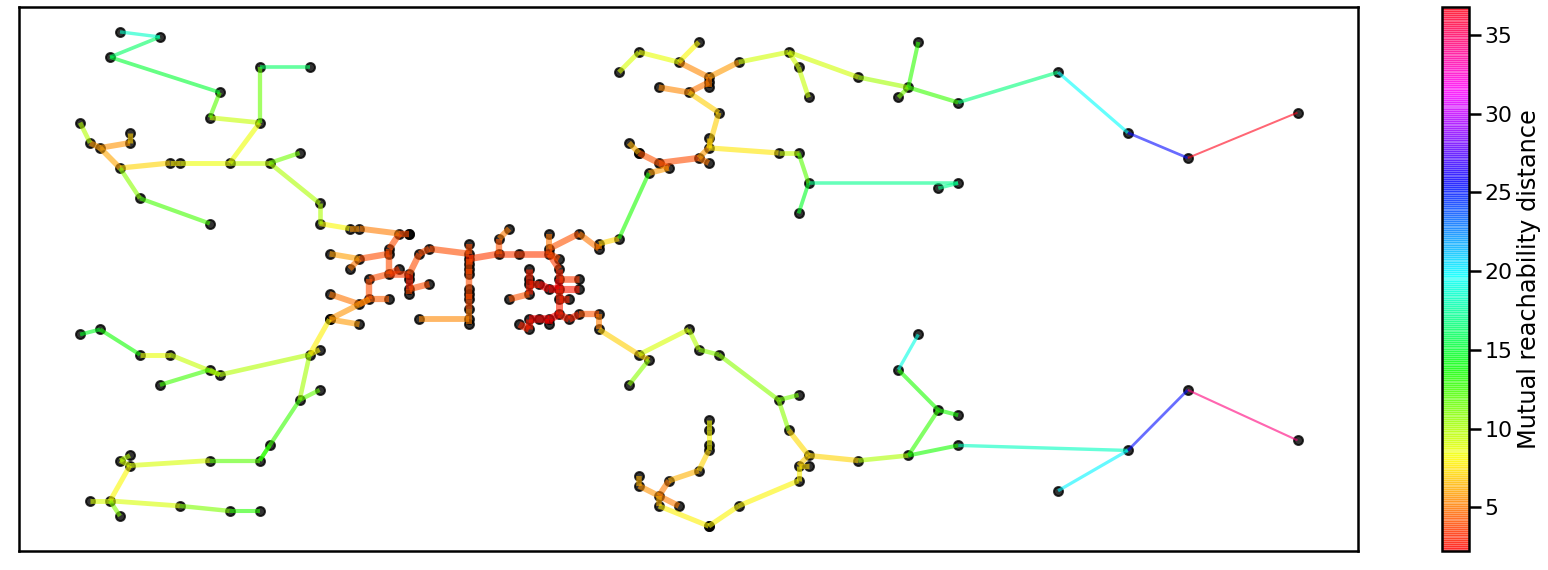

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(30,10))
clusterer.minimum_spanning_tree_.plot(edge_cmap='hsv', edge_alpha=.6,node_size=80,edge_linewidth=2)

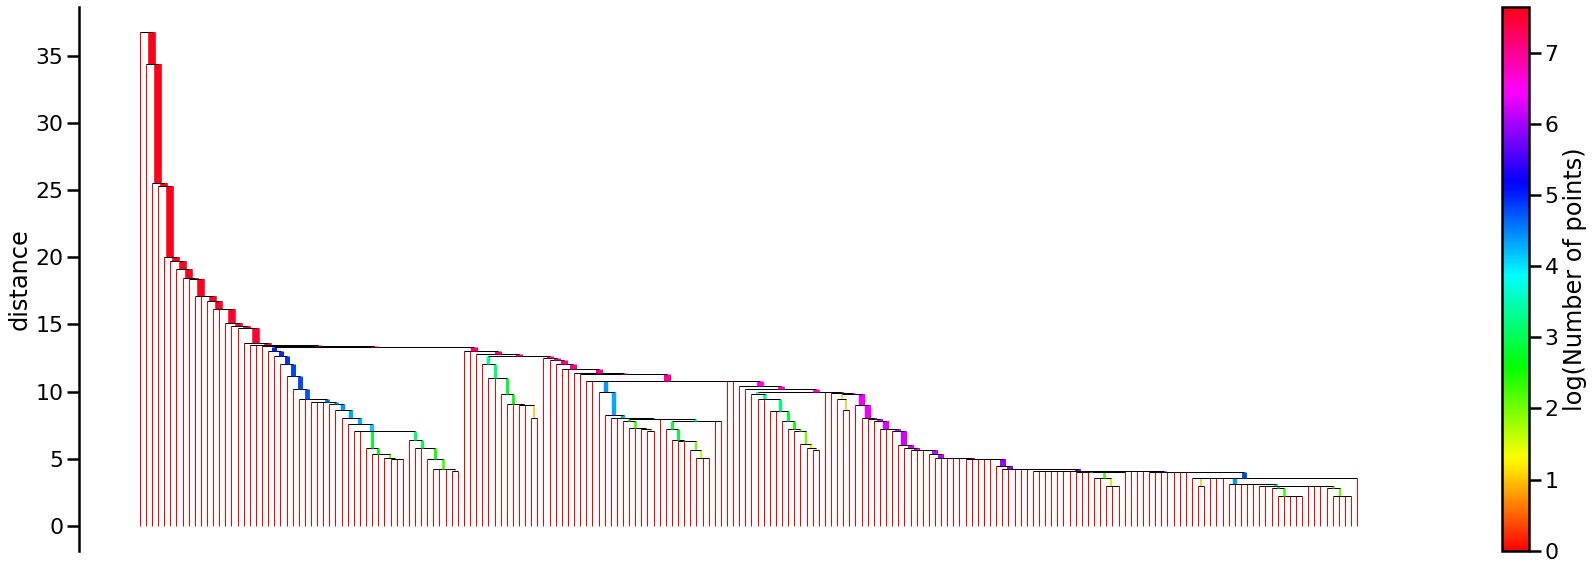

In [ ]:
figure(figsize=(30,10))
clusterer.single_linkage_tree_.plot(cmap='hsv',colorbar=True)

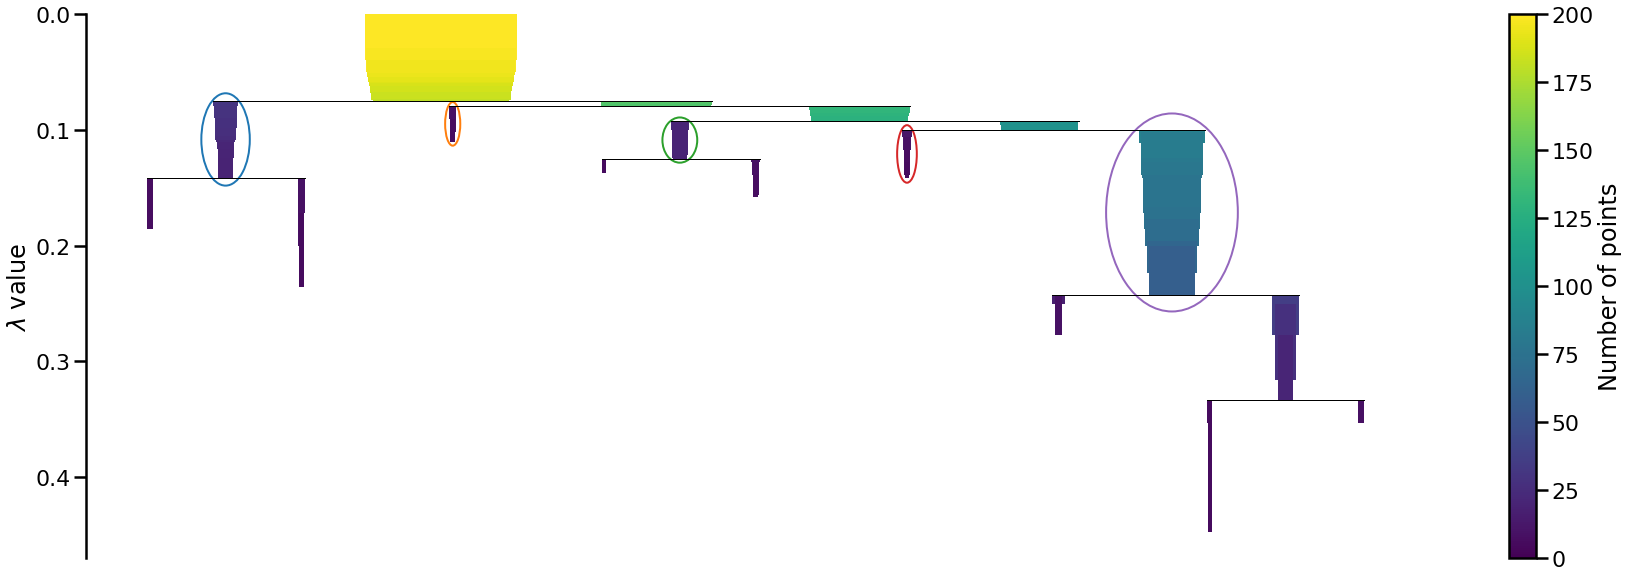

In [ ]:
figure(figsize=(30,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

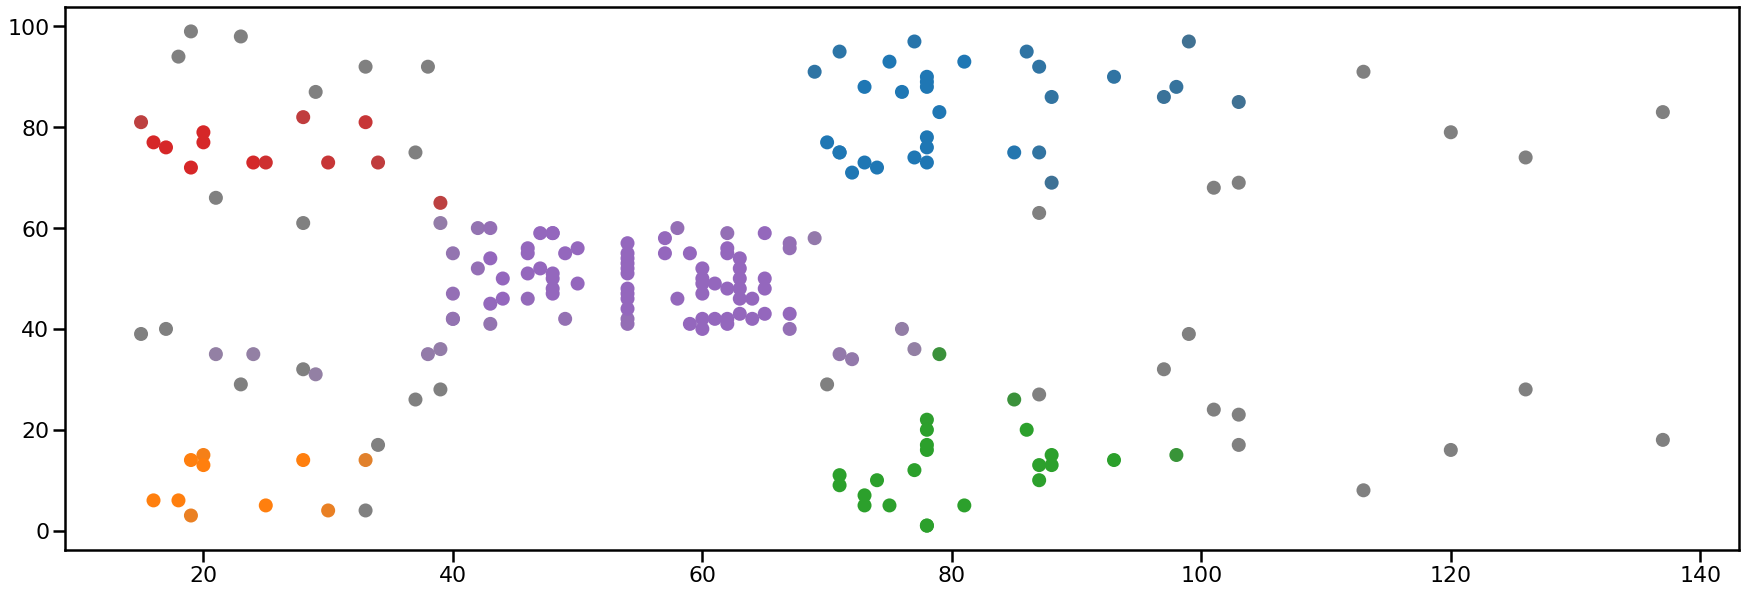

In [ ]:
palette = sns.color_palette()
clusterer_colors = [sns.desaturate(palette[col],sat) if col >=0 else (.5,.5,.5) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]

figure(figsize=(30,10))
plt.scatter(X.T[0],X.T[1], c=clusterer_colors)

#GMM



GMM asumismos que hay cierto numero de distribuciones gausiana y cada una de ellas representa un cluster. Teindre a grupar los puntos que pertenenecen a una fistribucion de manera conjunta

In [ ]:
x_frame = pd.DataFrame(X)

In [ ]:
x_frame.columns = ['AnnualIncome','SpendingScore']
x_frame

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Figure size 2160x720 with 0 Axes>

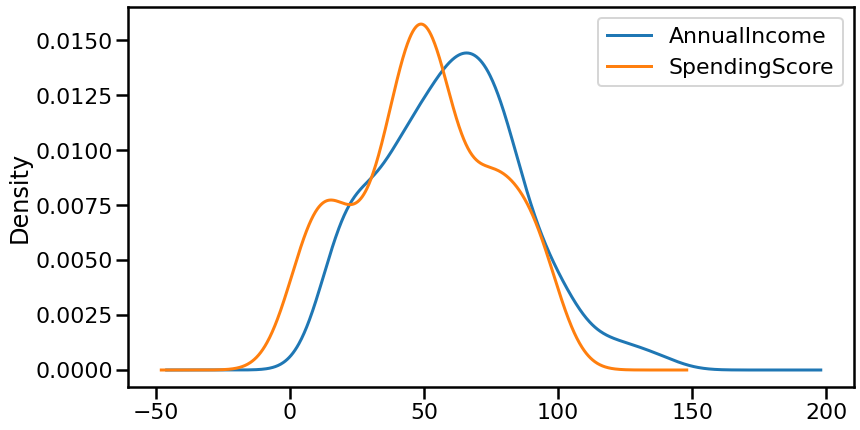

In [ ]:
figure(figsize=(30,10))
x_frame.plot(kind='kde', figsize=(13,7))
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

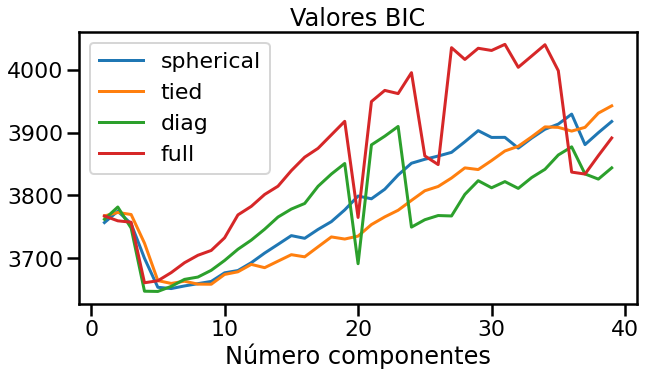

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))

n_components = range(1, 40)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GMM(n_components=i, covariance_type=covariance_type, random_state=123)
        modelo = modelo.fit(X)
        valores_bic.append(modelo.bic(X))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [ ]:
gm =GMM( n_components = 5, covariance_type = 'full', random_state=123)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=123, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
labels= gm.predict(X)
frame = pd.DataFrame(X)
frame['cluster']=labels
frame.columns=['AnnualIncome','SpendingScore','cluster']
frame.head()

,AnnualIncome,SpendingScore,cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


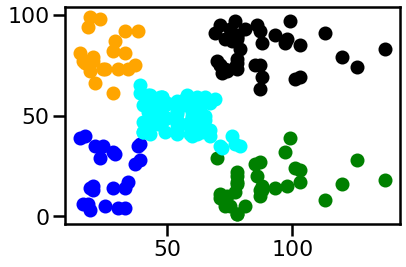

In [ ]:
color = ['blue','green','cyan','black','orange']
for k in range(0,5):
  data=frame[frame["cluster"]==k]
  plt.scatter(data["AnnualIncome"],data["SpendingScore"],c=color[k])
plt.show()  

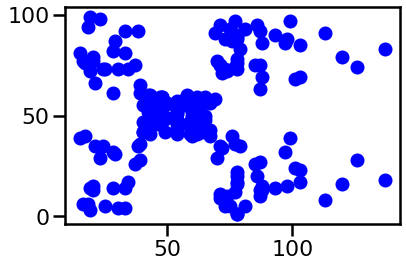

In [ ]:
plt.scatter(X.T[0], X.T[1], color='b')

In [ ]:
import time

In [ ]:
def plot_clusters(data, algorithm, args, kwds):
  start_time= time.time()
  labels = algorithm(*args, **kwds).fit_predict(data)
  end_time= time.time()
  palette = sns.color_palette('deep',np.unique(labels).max()+1)
  colors = [palette[x] if x>=0 else (0.0,0.0,0.0) for x in labels]
  plt.scatter(data.T[0],data.T[1], c= colors)
  plt.title('Cluster encontrados por{}'.format(str(algorithm.__name__)),fontsize=24)
  plt.text(-.6,-25,'Clusterizacion en {:.2f} segs'.format(end_time - start_time), fontsize =14)

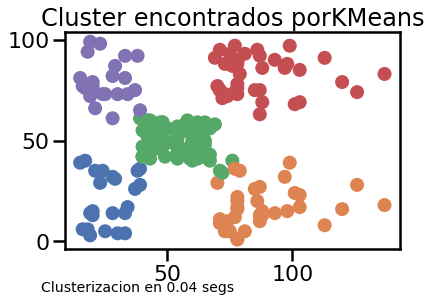

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':5,'random_state':123})

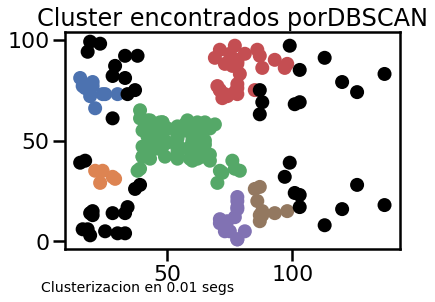

In [ ]:
plot_clusters(X, cluster.DBSCAN, (), {'eps':7.2})

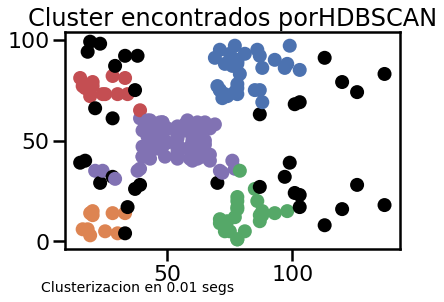

In [ ]:
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':5})

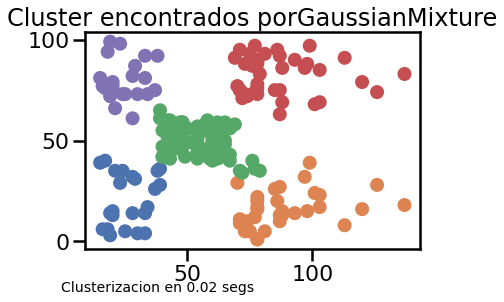

In [ ]:
plot_clusters(X, GMM, (), {'n_components':5,'covariance_type':'full','random_state':123})